## Import Packages

In [57]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt 
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

## Access Dataset

In [58]:
file_name = 'data_raw.csv'
data = pd.read_csv(file_name, sep = ',')
data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Clean Data

In [59]:
## replace missing value with 0
data['basementsqft'] = data['basementsqft'].fillna(0)
data['fireplacecnt'] = data['fireplacecnt'].fillna(0)
data['calculatedbathnbr'] = data['calculatedbathnbr'].fillna(0)
data['garagecarcnt'] = data['garagecarcnt'].fillna(0)
data['garagetotalsqft'] = data['garagetotalsqft'].fillna(0)

## replace missing value with mean
data['finishedsquarefeet12'] = data['finishedsquarefeet12'].fillna(scipy.mean(data['finishedsquarefeet12']))
data['calculatedfinishedsquarefeet'] = data['calculatedfinishedsquarefeet'].fillna(scipy.mean(data['calculatedfinishedsquarefeet']))
data['fullbathcnt'] = data['fullbathcnt'].fillna(round(scipy.mean(data['fullbathcnt'])))
data['lotsizesquarefeet'] = data['lotsizesquarefeet'].fillna(round(scipy.mean(data['lotsizesquarefeet'])))

## replace missing value with False
data['fireplaceflag'] = data['fireplaceflag'].fillna(False)
data['hashottuborspa'] = data['hashottuborspa'].fillna(False)

## EDA

In [60]:
lat = data['latitude']
minlat = lat.min() / 1000000
maxlat = lat.max() / 1000000
print("Range of Latitude: ", minlat, "N to ", maxlat, "N")

Range of Latitude:  33.324388 N to  34.81965 N


In [61]:
lon = data['longitude']
maxlon = -lon.min() / 1000000
minlon = -lon.max() / 1000000
print("Range of Longtitude: ", minlon, "W to ", maxlon, "W")

Range of Longtitude:  117.554316 W to  119.47578 W


In [62]:
data['num'] = 1

In [63]:
pos = DataFrame(data[['latitude', 'longitude']])
pos = pos.dropna()
pos.head()

,latitude,longitude
0,34144442.0,-118654084.0
1,34140430.0,-118625364.0
2,33989359.0,-118394633.0
3,34148863.0,-118437206.0
4,34194168.0,-118385816.0


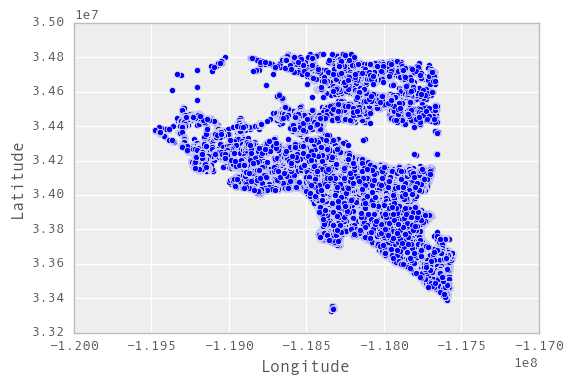

In [64]:
plt.scatter(pos['longitude'], pos['latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [65]:
ydata = DataFrame(data[['yearbuilt', 'num']])
ydata.columns = ['year', 'num']
# groupby the dataset by month
ydata = pd.DataFrame(ydata.groupby('year')['num'].sum()).reset_index()
ydata.head()

,year,num
0,1801.0,3
1,1805.0,1
2,1806.0,2
3,1807.0,1
4,1808.0,2


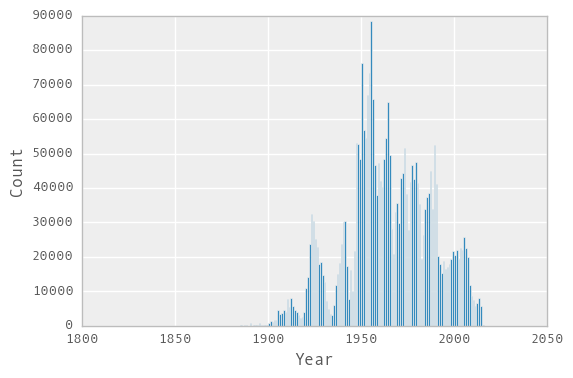

In [66]:
plt.bar(ydata['year'], ydata['num'])
plt.xlabel("Year")
plt.ylabel("Count")

In [67]:
beddata = DataFrame(data[['bedroomcnt', 'num']])
# groupby the dataset by month
beddata = pd.DataFrame(beddata.groupby('bedroomcnt')['num'].sum()).reset_index()
beddata = beddata[1:]
beddata.head()

,bedroomcnt,num
1,1.0,86610
2,2.0,605367
3,3.0,1169462
4,4.0,727052
5,5.0,181222


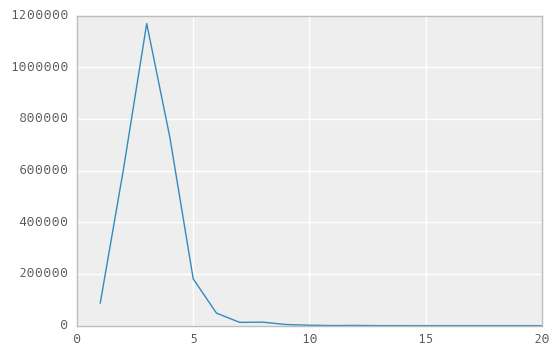

In [68]:
plt.plot(beddata['bedroomcnt'], beddata['num'])

In [69]:
taxdata = DataFrame(data[['roomcnt', 'taxamount']])
# groupby the dataset by month
taxdata = pd.DataFrame(taxdata.groupby('roomcnt')['taxamount'].mean()).reset_index()
taxdata = taxdata[1:]
taxdata.head()

,roomcnt,taxamount
1,1.0,14981.230649
2,2.0,4615.457834
3,3.0,4025.412445
4,4.0,3413.525670
5,5.0,3746.815001


<Container object of 35 artists>

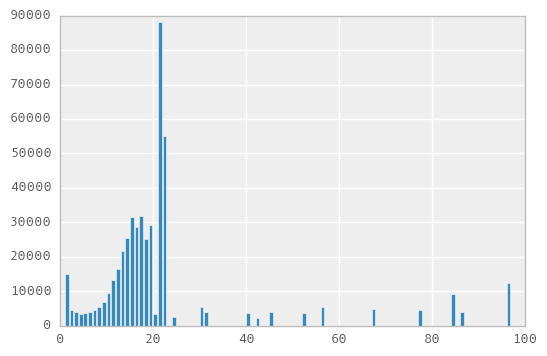

In [70]:
plt.bar(taxdata['roomcnt'], taxdata['taxamount'])

In [71]:
taxdata = DataFrame(data[['regionidzip', 'landtaxvaluedollarcnt']])
taxdata = DataFrame(taxdata.groupby('regionidzip')['landtaxvaluedollarcnt'].mean()).reset_index()
taxdata = taxdata.dropna()
taxdata.head()

taxdata = taxdata.sort_values(by = ['landtaxvaluedollarcnt'], ascending=False)
taxdata = taxdata[0:11]
taxdata

,regionidzip,landtaxvaluedollarcnt
163,96258.0,3.609709e+06
66,96086.0,1.771483e+06
311,96975.0,1.508074e+06
61,96058.0,1.481268e+06
87,96116.0,1.345233e+06
313,96979.0,1.191713e+06
106,96149.0,1.097222e+06
297,96957.0,1.071121e+06
314,96980.0,1.068658e+06
105,96148.0,1.050758e+06


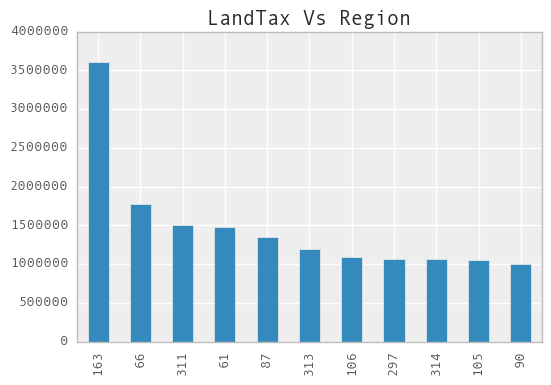

In [72]:
daily_temp = taxdata['landtaxvaluedollarcnt'].plot(kind = "bar",
                          title = "LandTax Vs Region",
                          legend = False)